In [1]:
# CNN ----> Convolutional Neural Network
# It is used for image related preprocessing and classification .
# Image -- > Pixels(0-255) ---- > Opx (black), 255px(white) ---- >
# Normalize ---- > (0-1)
# Layers ---- >
# (1). Dense Layer ---- > Fully connected layer 
# of upcoming step.
# (2). Convolutional Layer --- > Partially connected layer

# If there will be overfitting then we can use regularization layer .
# Pooling Layer ---->

In [2]:
import numpy as np 
a = np.arange(1,10).reshape(3,3)
a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [3]:
# stride and kernal --> stride means gap of values and kernal means filteration
#in matrix a i will tkae stride = 1 and kernal = (2,2)

In [4]:
# Max pooling --> 
#[1,2] --> max num = 5, min num = 1 , avg - (1+2+4+5)/4 = 12/4 = 3
#[4,5]

#[2,3] --> max num = 6, min num = 2 , avg - (2+3+5+6)/4 = 16/4 = 4
#[5,6]

#[4,5] --> max num = 8 , min num = 4 , avg - (4+5+7+8)/4 = 24/4 = 6
#[7,8]
 
#[5,6] --> max num = 9 , min num = 5 , avg - (5+6+8+9)/4 = 28/4 = 7
#[8,9]

#max pooling --> [5,6]
#                [8,9]

#min pooling --> [1,2]
#                [4,5]

#avg pooling --> [3,4]
#                [6,7]  

In [5]:
# Image ---> Parameters(Height , Width , color channel(RGB)) ---->
# Padding ---->

# 1 Image = (200,200,3)  , 2 Image = (250 , 200,3)  ---> for model training we have to do same shape of data.
# 1 Image ----> 50 0px add

# 1 Image = (250 , 200,3)
# 2 Image = (250 , 200 , 3)

# Padding means add 0px in a matrix of image .
# (1). Pre-Padding ----> Add Pixels in a image in starting .
# (2). Post-Padding ----> Add Pixels in a image in last .

# Flow of work in CNN ----->

# Data Gathering ---> Data Cleaning and Preprocessing (Feature Engineering) ---->
# Apply Model Sequential Architecture(input layer , hidden layer , output layer) ---->
# Model compile(optimizer , loss_function , metrics) ----->
# Model training  ----> Model Prediction ---> Model Accuracy .

In [6]:
# what are optimizers ?
# loss function --> difference (y_actual - y_predicted)
# (a) binary cross entropy --> when we have only two sub category in target coloumn 
# coloumn (has_covid) --> yes,no
#(b) sparsecategorical cross entropy --> when we have 2 or more then two sub categories in target coloumn.
#coloumn(colors)--> red , blue , green
# loss minimize --> optimizers(Adam, SGD)

In [29]:
import tensorflow as tf

In [30]:
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt

In [31]:
# load and split datsets 
(train_images, train_labels) , (test_images, test_labels) = datasets.cifar10.load_data()

In [32]:
class_names = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']
# Let's look at a one image. We change this to look at other images(img_index = 1 , 2 , 3 ....)

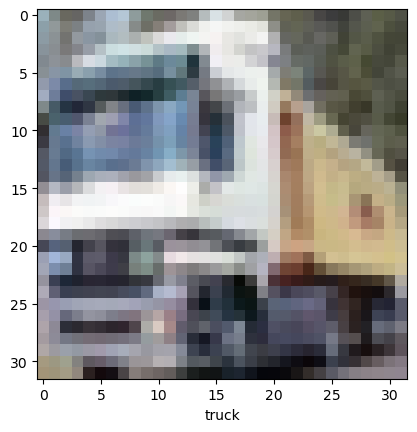

In [33]:
IMG_INDEX = 1
plt.imshow(train_images[IMG_INDEX] , cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (32 , 32 , 3)))
model.add(layers.MaxPooling2D((2,2)))  #This layer will perform the max pooling operation using 2x2 samples and a stride of 2 .
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation = 'relu'))

c:\Users\yasha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [42]:
history = model.fit(train_images, train_labels , epochs = 10 , validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3126 - loss: 2.7532 - val_accuracy: 0.4733 - val_loss: 1.4779
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5266 - loss: 1.3376 - val_accuracy: 0.5589 - val_loss: 1.2354
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5870 - loss: 1.1698 - val_accuracy: 0.5812 - val_loss: 1.1969
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6222 - loss: 1.0795 - val_accuracy: 0.6219 - val_loss: 1.0971
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6560 - loss: 0.9943 - val_accuracy: 0.6469 - val_loss: 1.0435
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6851 - loss: 0.9107 - val_accuracy: 0.6343 - val_loss: 1.0709
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6995 - loss: 0.8644 - val_accuracy: 0.6413 - val_loss: 1.0895
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7194 -

In [ ]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose = 2)
print(test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.6549 - loss: 1.0920
0.6549000144004822


: 

In [ ]:
# Q.1 - What is deep learning ? What is the difference between deep learning anf machine learning?
# Q.2 - What do you mean by 
